# Question: How does budget affect revenue and profitability?

# Import all of the relevant data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [48]:
# Assigning the movie gross table to variable
tn_movie_budgets_clean = pd.read_csv("tn_movie_budgets_clean.csv")
#importing joined_gross_budget_cleaned.csv in case we want to use profit margin
tn_movie_budgets_clean.head()


Unnamed: 0  release_date                                        movie  \
0           0  Dec 18, 2009                                       Avatar   
1           1  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2           2   Jun 7, 2019                                 Dark Phoenix   
3           3   May 1, 2015                      Avengers: Age of Ultron   
4           4  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0          425000000       760507625       2776345279  
1          410600000       241063875       1045663875  
2          350000000        42762350        149762350  
3          330600000       459005868       1403013963  
4          317000000       620181382       1316721747

In [49]:
# Assigning the joined_gross)budget to the variable
df = pd.read_csv("joined_gross_budget_cleaned.csv")
df.head()

title  month  year  production_budget  domestic_gross  \
0        (500) Days of Summer    7.0  2009          7500000.0      32425665.0   
1         10 Cloverfield Lane    3.0  2016          5000000.0      72082999.0   
2  10 Things I Hate About You    3.0  1999         13000000.0      38177966.0   
3                 10,000 B.C.    3.0  2008        105000000.0      94784201.0   
4                  12 Monkeys   12.0  1995         29000000.0      57141459.0   

   worldwide_gross     net_prof  net_margin_%  
0       34439060.0   26939060.0         78.22  
1      108286422.0  103286422.0         95.38  
2       60413950.0   47413950.0         78.48  
3      269065678.0  164065678.0         60.98  
4      168841459.0  139841459.0         82.82

# Tidying up 

In [27]:
#checking the shape of the movie budgets
tn_movie_budgets_clean.shape

(5782, 6)

In [53]:
tn_movie_budgets_clean.isna().sum()

Unnamed: 0           0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [54]:
tn_movie_budgets_clean.describe()

Unnamed: 0  production_budget  domestic_gross  worldwide_gross
count  5782.00000       5.782000e+03    5.782000e+03     5.782000e+03
mean   2890.50000       3.158776e+07    4.187333e+07     9.148746e+07
std    1669.26396       4.181208e+07    6.824060e+07     1.747200e+08
min       0.00000       1.100000e+03    0.000000e+00     0.000000e+00
25%    1445.25000       5.000000e+06    1.429534e+06     4.125415e+06
50%    2890.50000       1.700000e+07    1.722594e+07     2.798445e+07
75%    4335.75000       4.000000e+07    5.234866e+07     9.764584e+07
max    5781.00000       4.250000e+08    9.366622e+08     2.776345e+09

In [50]:
#Using value_counts() to check for placeholder values and duplicates
tn_movie_budgets_clean["movie"].value_counts()

King Kong                           3
Home                                3
Halloween                           3
Life                                2
Pet Sematary                        2
                                   ..
Manchester by the Sea               1
The Queen                           1
Black Knight                        1
Eddie: The Sleepwalking Cannibal    1
Spirit: Stallion of the Cimarron    1
Name: movie, Length: 5698, dtype: int64

In [55]:
#Checking that duplicate titles are valid
tn_movie_budgets_clean[tn_movie_budgets_clean["movie"] == "Pet Sematary"]
tn_movie_budgets_clean[tn_movie_budgets_clean["movie"] == "King Kong"]

Unnamed: 0  release_date      movie  production_budget  domestic_gross  \
39            39  Dec 14, 2005  King Kong          207000000       218080025   
2374        2374  Dec 17, 1976  King Kong           23000000        52614445   
5396        5396   Apr 7, 1933  King Kong             672000        10000000   

      worldwide_gross  
39          550517357  
2374         90614445  
5396         10000650

In [56]:
#Checking out df
df.describe()

month         year  production_budget  domestic_gross  \
count  3657.000000  3657.000000       3.657000e+03    3.657000e+03   
mean      7.025431  2002.926989       3.844772e+07    6.258730e+07   
std       3.436380    13.809895       4.745361e+07    7.827059e+07   
min       1.000000  1915.000000       1.100000e+03    0.000000e+00   
25%       4.000000  1999.000000       7.000000e+06    1.443998e+07   
50%       7.000000  2006.000000       2.000000e+07    3.812200e+07   
75%      10.000000  2012.000000       5.000000e+07    7.936698e+07   
max      12.000000  2019.000000       4.250000e+08    9.366622e+08   

       worldwide_gross      net_prof  net_margin_%  
count     3.657000e+03  3.657000e+03   3657.000000  
mean      1.389436e+08  1.004959e+08     62.261485  
std       2.047894e+08  1.707332e+08     24.497175  
min       7.164400e+04  3.490000e+02      0.030000  
25%       2.548003e+07  1.113498e+07     46.050000  
50%       6.734822e+07  3.797725e+07     67.170000  
75%       1.646754e+08  1.128864e+08     81.680000  
max       2.776345e+09  2.351345e+09     99.940000

In [58]:
#Using value_counts() to check for placeholder values and duplicates
df["title"].value_counts()
#Based on genereal knowldge duplicates are valied (re-releases)

Halloween                     3
King Kong                     3
The Last House on the Left    2
Death at a Funeral            2
Ghostbusters                  2
                             ..
The Ides of March             1
Enough Said                   1
Looper                        1
Vampires                      1
Eight Below                   1
Name: title, Length: 3611, dtype: int64

# Visualization

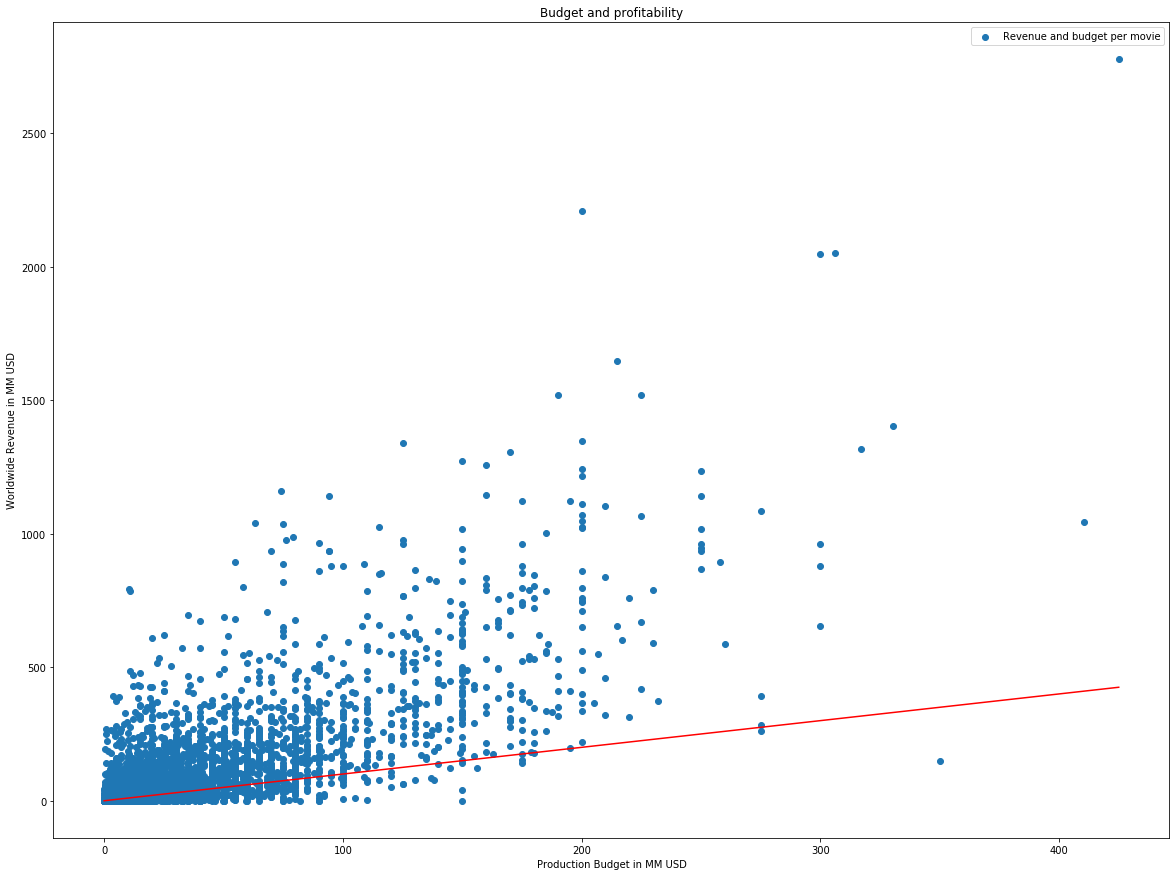

In [59]:
#Plotting budget and worldwide gross

#Dividing values by one million to make them easier to plot
data1 = tn_movie_budgets_clean["production_budget"].map(lambda x: round(x / 1000000, 2))
data2 = tn_movie_budgets_clean["worldwide_gross"].map(lambda x: round(x / 1000000, 2))

#Creating a figure
new_figure = plt.figure(figsize=(20,15))
# Add a subplot to the figure - a new axes
ax = new_figure.add_subplot(111)
#scatter of budget and worldwide gross
ax.scatter(data1, data2, label='Sample Data')
ax.legend(["Revenue and budget per movie"])

#line plot 
ax.plot(data1, data1, color="r")

# Add labels for x and y axes
plt.xlabel('Production Budget in MM USD')
plt.ylabel('Worldwide Revenue in MM USD')

#Add title
plt.title("Budget and profitability")

# Output the final plot
plt.show()

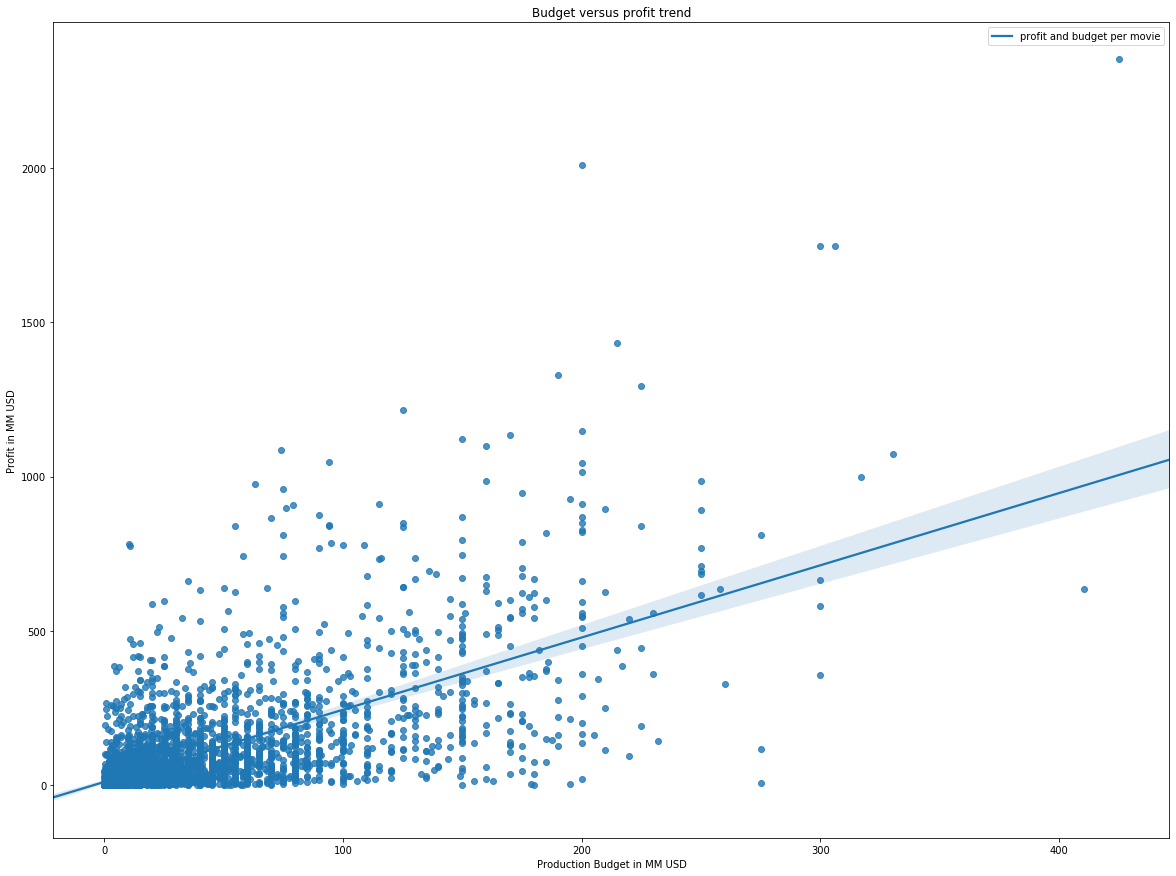

In [68]:
#Plotting budget and worldwide gross

#Dividing values by one million to make them easier to plot
data1 = df["production_budget"].map(lambda x: round(x / 1000000, 2))
data2 = df["net_prof"].map(lambda x: round(x / 1000000, 2))

#Creating a figure
new_figure = plt.figure(figsize=(20,15))

# Add a subplot to the figure - a new axes
ax = sns.regplot(x=data1, y=data2)

#scatter of budget and worldwide gross

ax.legend(["profit and budget per movie"])



# Add labels for x and y axes
plt.xlabel('Production Budget in MM USD')
plt.ylabel('Profit in MM USD')

#Add title
plt.title("Budget versus profit trend")

# Output the final plot
plt.show()

# Conclusion


As we can see from the first scatter more movies with lower budget are unprofitable. Movies in the middle of the range for budget values have the highest proportion of profitable movies. As we can see from the second figure there is a strong trend for profits to increase as the budget increases. Overall, the higher budget decreases the chances that the movie is unprofitable and leads to a higher profit, which makes sense given that higher budget movies go through a more rigourous vetting proccess.


# Dataframes cleaned by Alex

AT1: dataframe_id_imdb_title_basics_gz.csv
AT2: dataframe_id_imdb_title_crew_gz.csv
AT3: dataframe_id_imdb_title_principals_gz.csv

AT1: dataframe_id_imdb_title_basics_gz.csv

In [6]:
#importing dataframe (AT dataset 1)
title_basics = pd.read_csv("dataframe_id_imdb_title_basics_gz.csv")
title_basics.head()
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
#checking for missing values
#given that most runtime minutes values are present, it does not make sense to delete a column
#using the mean of exisiting runtime minutes to replace the missing ones would allow to do further EDA, 
#although it will skew results toward the mean

title_basics.isna().sum()


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [10]:
#replacing missing runtime_minutes values with mean of existing runtime minutes
title_basics["runtime_minutes"] = title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].mean())
title_basics.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [12]:
#checking to see if any start year is suspicious
#values above 2020 need to be filtered out 
title_basics['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027])

In [20]:
#Checking for duplicates using duplicated
#no duplicates were revealed
duplicates = title_basics[title_basics.duplicated(subset='tconst')]
print(len(duplicates))
duplicates.tail()

0


Empty DataFrame
Columns: [tconst, primary_title, original_title, start_year, runtime_minutes, genres]
Index: []

In [21]:
#Checking for placeholder values and duplicates using value_counts()
#Some films appear mutliple times
title_basics["original_title"].value_counts()

Broken                           19
Home                             18
The Return                       17
The Gift                         13
Alone                            13
                                 ..
Jurakan: Nation in Resistance     1
Autumn of Route 66                1
L'equilibrio del cucchiaino       1
Paint the Sky                     1
Winning Formula                   1
Name: original_title, Length: 137773, dtype: int64

In [14]:
#Some films in the primary_title column also appear multiple times
title_basics["primary_title"].value_counts()

Home                                                      24
The Return                                                20
Broken                                                    20
Homecoming                                                16
Alone                                                     16
                                                          ..
Through Our Eyes: South Africa                             1
Beyond the Shield                                          1
McEnroe: Cuando abrimos las ventanas para ver amanecer     1
Waxie Moon in Fallen Jewel                                 1
Winning Formula                                            1
Name: primary_title, Length: 136071, dtype: int64

In [15]:
#Numerical identifier appears to be unique for each film
title_basics["tconst"].value_counts()

tt6778612     1
tt9387520     1
tt3867870     1
tt6022086     1
tt8448558     1
             ..
tt3814566     1
tt2404916     1
tt10379936    1
tt3839344     1
tt2121377     1
Name: tconst, Length: 146144, dtype: int64

In [25]:
#Exploring films named "Home"
home_values = title_basics[title_basics["primary_title"] == "Home"]
home_values.head()

tconst primary_title original_title  start_year  runtime_minutes  \
27295  tt2075392          Home           Yurt        2011             76.0   
27922  tt2089701          Home           Home        2011              7.0   
28069  tt2093100          Home            Dom        2011            127.0   
32554  tt2224026          Home           Home        2015             94.0   
38079  tt2372760          Home          Hemma        2013             90.0   

                           genres  
27295                       Drama  
27922    Documentary,Drama,Family  
28069                       Drama  
32554  Adventure,Animation,Comedy  
38079               Drama,Romance

In [24]:
#Exploring films named "The Return"
thereturn_values = title_basics[title_basics["primary_title"] == "The Return"]
thereturn_values.head()

tconst primary_title original_title  start_year  runtime_minutes  \
20131  tt1848871    The Return     El regreso        2012            102.0   
32434  tt2219720    The Return     The Return        2012             16.0   
43277  tt2578550    The Return     El Regreso        2012             69.0   
58088  tt3387284    The Return     The Return        2014             83.0   
71702  tt4093816    The Return     The Return        2015             92.0   

                            genres  
20131                        Drama  
32434  Documentary,History,Western  
43277                        Drama  
58088                  Documentary  
71702       Crime,Mystery,Thriller

In [26]:
#Exploring films named "Broken"
broken_values = title_basics[title_basics["primary_title"] == "Broken"]
broken_values.head()

tconst primary_title original_title  start_year  runtime_minutes  \
7657   tt1441940        Broken         Broken        2012        91.000000   
8049   tt1475314        Broken         Broken        2010        86.187247   
13968  tt1702458        Broken         Broken        2011        86.187247   
14755  tt1723736        Broken         Broken        2011        45.000000   
15935  tt1753546        Broken         Broken        2010        45.000000   

              genres  
7657   Drama,Romance  
8049             NaN  
13968          Drama  
14755          Drama  
15935          Drama

As we can see from above some movies may be duplicates, however the names home, return, broken, etc are common and may be movies made in different countries, therefore keeping them

In [27]:
#replacing missing values for genres with string "missing"
title_basics['genres'] = title_basics['genres'].fillna(value="missing")
title_basics.isna().sum()

tconst              0
primary_title       0
original_title     21
start_year          0
runtime_minutes     0
genres              0
dtype: int64

In [29]:
#Identifying placeholder values and erroneous data through value_counts
#A small proportion of films has release date greater than 2020
title_basics.start_year.value_counts(normalize=True)

2017    0.119772
2016    0.118185
2018    0.115290
2015    0.111144
2014    0.106669
2013    0.100647
2012    0.094338
2011    0.088269
2010    0.081078
2019    0.057334
2020    0.006411
2021    0.000568
2022    0.000219
2023    0.000034
2024    0.000014
2027    0.000007
2026    0.000007
2025    0.000007
2115    0.000007
Name: start_year, dtype: float64

In [31]:
#removing all rows associated with starting year greater than 2020
title_basics = title_basics[title_basics.start_year < 2020]
title_basics["start_year"].max()
title_basics.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013       175.000000    Action,Crime,Drama  
1        2019       114.000000       Biography,Drama  
2        2018       122.000000                 Drama  
3        2018        86.187247          Comedy,Drama  
4        2017        80.000000  Comedy,Drama,Fantasy

In [32]:
# Splitting genres and keeping separated by commas to look cleaner (Ayesha)
title_basics['genres'] = title_basics['genres'].apply(lambda x: x.split(",") if x else x)
title_basics.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                    genres  
0        2013       175.000000    [Action, Crime, Drama]  
1        2019       114.000000        [Biography, Drama]  
2        2018       122.000000                   [Drama]  
3        2018        86.187247           [Comedy, Drama]  
4        2017        80.000000  [Comedy, Drama, Fantasy]

In [34]:
#Checking again for missing values
#there are some missing values in the original_title column
title_basics.isna().sum()

tconst              0
primary_title       0
original_title     20
start_year          0
runtime_minutes     0
genres              0
dtype: int64

In [40]:
##Exploring films with missing original_title
#It appers that the majority of films with missing original_title are domestic, so it can be assumed the same as the primary title
#There are several ways to address this: replace missing values with string missing, drop rows, replace missing values with values from adjacent columns
#Since we do not need original_title for later analysis, leave as is
missing_original = title_basics[title_basics["original_title"].isna() == True]
missing_original.head()
missing_original.tail()

tconst                            primary_title original_title  \
112608  tt6603544                                 Utopians            NaN   
115131  tt6823030  Hilfe, ich hab meine Eltern geschrumpft            NaN   
115983  tt6882442   Hirugao: Love Affairs in the Afternoon            NaN   
116205  tt6900940            Hasan Minhaj: Homecoming King            NaN   
116350  tt6911842                               Senioritus            NaN   

        start_year  runtime_minutes       genres  
112608        2015        86.187247    [missing]  
115131        2018        86.187247  [Adventure]  
115983        2017       125.000000    [Romance]  
116205        2017        86.187247    [missing]  
116350        2017        75.000000    [missing]

AT2: dataframe_id_imdb_title_crew_gz.csv

In [41]:
title_crew = pd.read_csv("dataframe_id_imdb_title_crew_gz.csv")
title_crew.head()

tconst                      directors              writers
0  tt0285252                      nm0899854            nm0899854
1  tt0438973                            NaN  nm0175726,nm1802864
2  tt0462036                      nm1940585            nm1940585
3  tt0835418                      nm0151540  nm0310087,nm0841532
4  tt0878654  nm0089502,nm2291498,nm2292011            nm0284943

In [52]:
print(title_crew.shape)
title_crew.isna().sum()


(146144, 3)


tconst           0
directors     5727
writers      35883
dtype: int64

In [44]:
#No duplicates revealed using duplicates
duplicates2 = title_crew[title_crew.duplicated(subset='tconst')]
print(len(duplicates2))
duplicates2.tail()

0


Empty DataFrame
Columns: [tconst, directors, writers]
Index: []

In [49]:
#Using value_counts() to identify directors and writers with most movies
title_crew['tconst'].value_counts()
title_crew['directors'].value_counts()
title_crew['writers'].value_counts()

nm0000636              80
nm2682776              48
nm3266654              46
nm3583561              40
nm0772905              34
                       ..
nm0163837,nm4677993     1
nm0728731               1
nm5209801               1
nm4396811,nm4298559     1
nm4211007,nm4041044     1
Name: writers, Length: 91920, dtype: int64

In [53]:
title_crew.isna().sum()

tconst           0
directors     5727
writers      35883
dtype: int64

In [56]:
#Removing rows where values for directors or writers are missing
title_crew.dropna(how='any', subset=['directors', 'writers'], inplace=True)
title_crew.isna().sum()
title_crew.shape

(109008, 3)

AT3: dataframe_id_imdb_title_principals_gz.csv

In [57]:
#importing a dataframe (AT Dataframe 3)
title_principals = pd.read_csv("dataframe_id_imdb_title_principals_gz.csv")
title_principals.head()

tconst  ordering     nconst  category       job        characters
0  tt0111414         1  nm0246005     actor       NaN       ["The Man"]
1  tt0111414         2  nm0398271  director       NaN               NaN
2  tt0111414         3  nm3739909  producer  producer               NaN
3  tt0323808        10  nm0059247    editor       NaN               NaN
4  tt0323808         1  nm3579312   actress       NaN  ["Beth Boothby"]

In [58]:
#checking for missing values
title_principals.isna().sum()


tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [59]:
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [60]:
#checking for duplicates
title_principals[title_principals.duplicated(keep=False)].sort_values(by='tconst').head()

Empty DataFrame
Columns: [tconst, ordering, nconst, category, job, characters]
Index: []

In [61]:
#Checkign again to see if all movies appear just once
title_principals.tconst.value_counts(normalize=True)

tt6337930     9.725867e-06
tt6535880     9.725867e-06
tt4042802     9.725867e-06
tt10078676    9.725867e-06
tt3591696     9.725867e-06
                  ...     
tt4196940     9.725867e-07
tt7697422     9.725867e-07
tt10441932    9.725867e-07
tt3762152     9.725867e-07
tt2337783     9.725867e-07
Name: tconst, Length: 143454, dtype: float64

In [62]:
#Checking to see how many movies each nconst appers in
title_principals.nconst.value_counts(normalize=True)

nm1930572    3.676378e-04
nm0000636    1.556139e-04
nm0000616    1.439428e-04
nm0103977    1.225459e-04
nm4394575    1.001764e-04
                 ...     
nm9413867    9.725867e-07
nm4700395    9.725867e-07
nm3103516    9.725867e-07
nm5089815    9.725867e-07
nm8264849    9.725867e-07
Name: nconst, Length: 604546, dtype: float64

In [66]:
print(title_principals.shape)
title_principals['job'].isna().sum()

(1028186, 6)


850502

In [67]:
#dropping a job column because about 85 percent of values are missing and it is redundant because of column category
title_principals = title_principals.drop('job', axis = 1)
title_principals.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
characters    634826
dtype: int64

In [69]:
#Finding all the unique values of the category
#Hence we can see that the character values are likely appropriate for "actor" or "actress"
title_principals.category.unique()

array(['actor', 'director', 'producer', 'editor', 'actress', 'composer',
       'cinematographer', 'writer', 'self', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [70]:
title_principals.category.value_counts()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [76]:
#Creating a dataframe with actor only
actors_df = title_principals[title_principals['category'] == "actor"]
actors_df.tail()

tconst  ordering      nconst category            characters
1028175  tt9681728         9  nm10397910    actor          ["Corpsman"]
1028176  tt9689618         1  nm10439726    actor                   NaN
1028177  tt9689618         2  nm10439727    actor                   NaN
1028178  tt9689618         3  nm10439724    actor                   NaN
1028181  tt9692684         1   nm0186469    actor  ["Ebenezer Scrooge"]

In [78]:
#Creating a dataframe with actress only
actress_df = title_principals[title_principals['category'] == "actress"]
actress_df.tail()

tconst  ordering      nconst category  \
1028142  tt9672244         1   nm0260884  actress   
1028145  tt9672244         4   nm0508708  actress   
1028161  tt9679036         1   nm9742452  actress   
1028163  tt9679036         3   nm7751067  actress   
1028164  tt9679036         4  nm10435078  actress   

                               characters  
1028142                         ["Marie"]  
1028145                               NaN  
1028161                ["Yuna Takahashi"]  
1028163  ["Penelope (Penny) Fitzherbert"]  
1028164                  ["The Old Lady"]

In [79]:
#Replacing missing values with string missing because do not want to lose exisiting information on which actor has each role
title_principals['characters'] = title_principals['characters'].fillna(value="missing")
title_principals.isna().sum()

tconst        0
ordering      0
nconst        0
category      0
characters    0
dtype: int64